In [16]:
import os

# Kaggle API credentials
kaggle_json = '{"username":"divyanshi23002","key":"73eb79633d7b20ba5224205c0083df60"}'

# Setup Kaggle directory and file
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)
kaggle_file_path = os.path.join(kaggle_dir, "kaggle.json")

# Write Kaggle API credentials to file
with open(kaggle_file_path, "w") as f:
    f.write(kaggle_json)

# Set appropriate permissions for the file
os.chmod(kaggle_file_path, 0o600)

# Time Series Datasets
dataset_slug = "shenba/time-series-datasets"
output_dir = "Time_Series_Datasets"

# Download and extract the dataset
print(f"Downloading {dataset_slug}...")
os.system(f"kaggle datasets download -d {dataset_slug} -p {output_dir}")
os.system(f"unzip -q {output_dir}/*.zip -d {output_dir}")
print(f"{dataset_slug} downloaded and extracted successfully!")


Dataset URL: https://www.kaggle.com/datasets/shenba/time-series-datasets
License(s): unknown

shenba/time-series-datasets downloaded and extracted successfully!


100%|██████████| 19.2k/19.2k [00:00<00:00, 1.07MB/s]


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
df = pd.read_csv("/Users/divayanshisharama/Desktop/Time series lab/e22cseu1085_lab2/Time_Series_Datasets/sales-of-shampoo-over-a-three-ye.csv")

In [20]:
df.head()

,Month,Sales of shampoo over a three year period
0,1-Jan,266.0
1,1-Feb,145.9
2,1-Mar,183.1
3,1-Apr,119.3
4,1-May,180.3


In [21]:
df.columns

Index(['Month', 'Sales of shampoo over a three year period'], dtype='object')

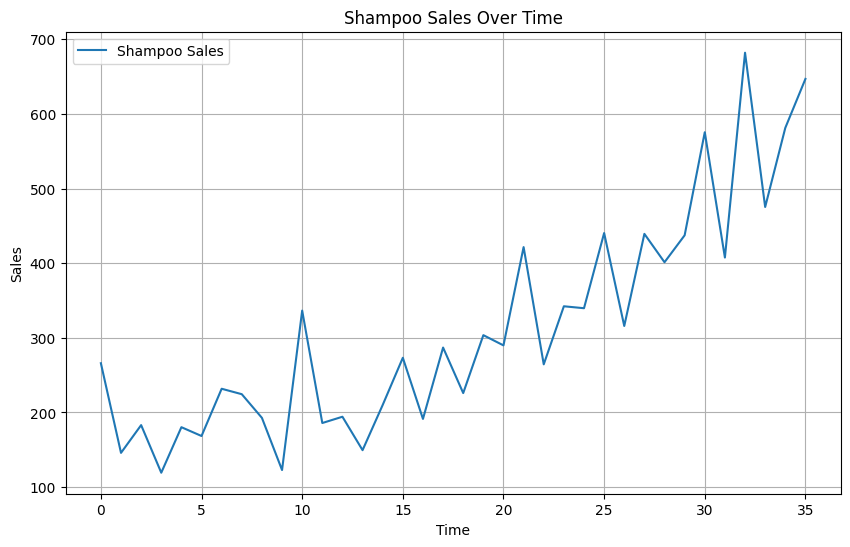

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df['Sales'], label='Shampoo Sales')
plt.title('Shampoo Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

In [26]:

result = adfuller(df['Sales of shampoo over a three year period'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")


if result[1] > 0.05:
    print("The time series is non-stationary.")
else:
    print("The time series is stationary.")


ADF Statistic: 2.43123375840302
p-value: 0.9990242586186716
Critical Values:
   1%: -3.7529275211638033
   5%: -2.998499866852963
   10%: -2.6389669754253307
The time series is non-stationary.


In [25]:
df['Differenced_Sales'] = df['Sales of shampoo over a three year period'].diff()


df.dropna(inplace=True)


result_diff = adfuller(df['Differenced_Sales'])

print("\nAfter Differencing:")
print("ADF Statistic:", result_diff[0])
print("p-value:", result_diff[1])
print("Critical Values:")
for key, value in result_diff[4].items():
    print(f"   {key}: {value}")

if result_diff[1] > 0.05:
    print("The differenced time series is non-stationary.")
else:
    print("The differenced time series is stationary.")



After Differencing:
ADF Statistic: -7.544313572399689
p-value: 3.314475629646273e-11
Critical Values:
   1%: -3.653519805908203
   5%: -2.9572185644531253
   10%: -2.6175881640625
The differenced time series is stationary.


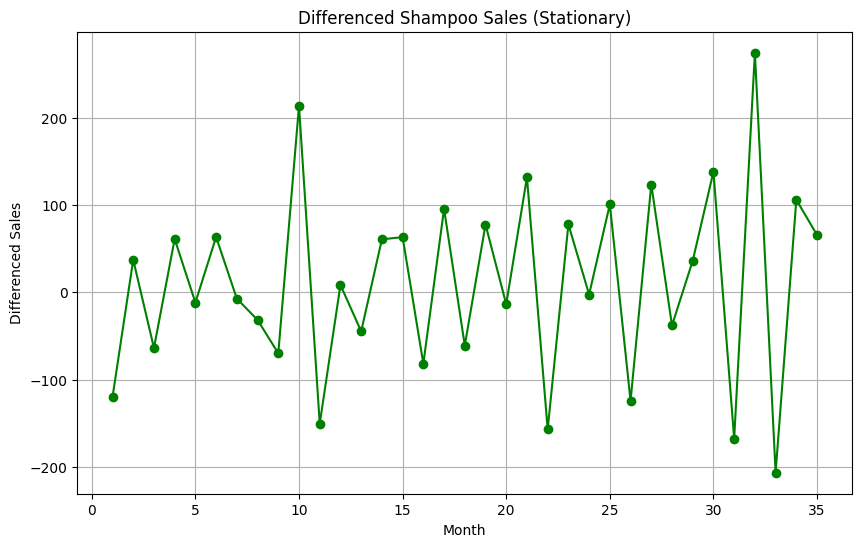

In [24]:

plt.figure(figsize=(10, 6))
plt.plot(df['Differenced_Sales'], marker='o', linestyle='-', color='g')
plt.title("Differenced Shampoo Sales (Stationary)")
plt.xlabel("Month")
plt.ylabel("Differenced Sales")
plt.grid()
plt.show()


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import matplotlib.dates as mdates
df2= pd.read_csv("/Users/divayanshisharama/Desktop/Time series lab/e22cseu1085_lab2/Time_Series_Datasets/monthly-beer-production-in-austr.csv")
df2.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [52]:
df2.columns

Index(['Month', 'Monthly beer production'], dtype='object')

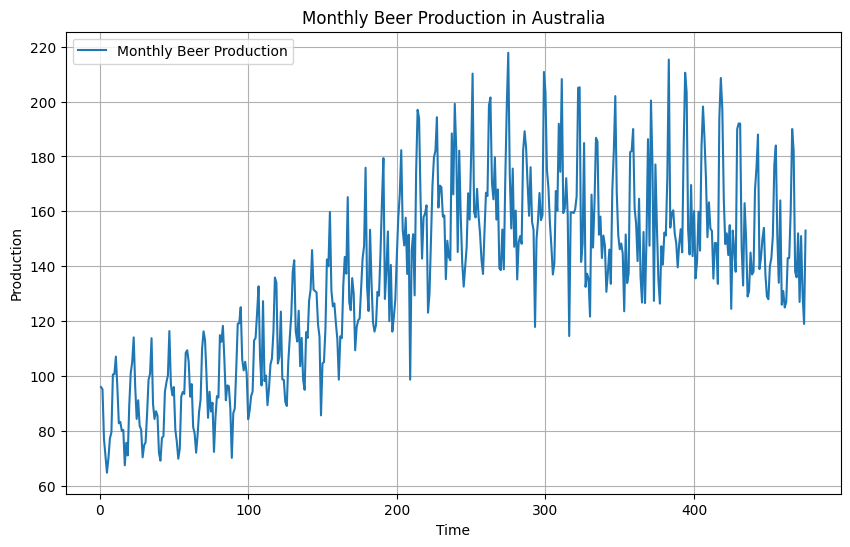

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(df2['Monthly beer production'], label='Monthly Beer Production')
plt.title('Monthly Beer Production in Australia')
plt.xlabel('Time')
plt.ylabel('Production')
plt.legend()
plt.grid()
plt.show()

In [54]:

result = adfuller(df2['Monthly beer production'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")


if result[1] > 0.05:
    print("The time series is non-stationary.")
else:
    print("The time series is stationary.")


ADF Statistic: -2.2826614187875784
p-value: 0.17762099829132466
Critical Values:
   1%: -3.4447087976702284
   5%: -2.867871300049488
   10%: -2.5701423432047443
The time series is non-stationary.


In [55]:
df2['Differenced_Sales'] = df2['Monthly beer production'].diff()


df2.dropna(inplace=True)


result_diff2 = adfuller(df2['Differenced_Sales'])

print("\nAfter Differencing:")
print("ADF Statistic:", result_diff2[0])
print("p-value:", result_diff2[1])
print("Critical Values:")
for key, value in result_diff2[4].items():
    print(f"   {key}: {value}")

if result_diff2[1] > 0.05:
    print("The differenced time series is non-stationary.")
else:
    print("The differenced time series is stationary.")



After Differencing:
ADF Statistic: -4.980663743064853
p-value: 2.423411785995396e-05
Critical Values:
   1%: -3.4447721346720885
   5%: -2.8678991615065095
   10%: -2.570157193174823
The differenced time series is stationary.


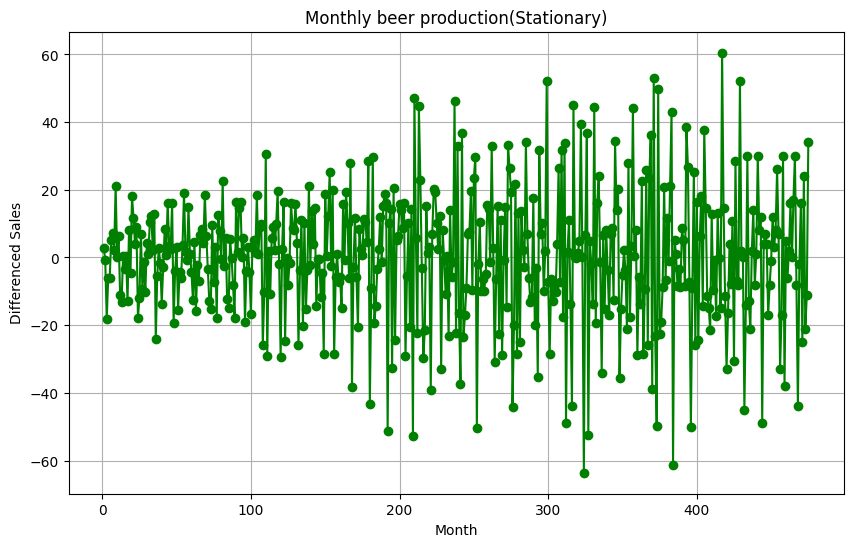

In [56]:

plt.figure(figsize=(10, 6))
plt.plot(df2['Differenced_Sales'], marker='o', linestyle='-', color='g')
plt.title("Monthly beer production(Stationary)")
plt.xlabel("Month")
plt.ylabel("Differenced Sales")
plt.grid()
plt.show()
